# KNN

Given a data point:
* Calculate distance from all other data points
* Get the closest K points
* Get the average of their values
* Get the label with majority vote

In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def euclidean_distance(x1, x2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    - x1: The first point.
    - x2: The second point.

    Returns:
    - distance: The Euclidean distance between the two points.
    """
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier with a value for k.

        Parameters:
        - k: The number of nearest neighbors to consider.
        """
        self.k = k
        
    def fit(self, X, y):
        """
        Store the training data and labels.

        Parameters:
        - X: The input features of the training data.
        - y: The target values of the training data.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Make predictions for the given input data.

        Parameters:
        - X: The input features of the data points to predict.

        Returns:
        - predictions: The predicted target values.
        """
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        """
        Predict the label for a single input sample.

        Parameters:
        - x: The input features of a single data point.

        Returns:
        - label: The predicted label for the input sample.
        """
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Calculate the distances between the input sample and all training samples
        k_indices = np.argsort(distances)[:self.k]
        # Find the indices of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Get the labels of the k nearest neighbors
        most_common = Counter(k_nearest_labels).most_common()
        # Find the most common label among the k nearest neighbors
        return most_common[0][0]

In [3]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

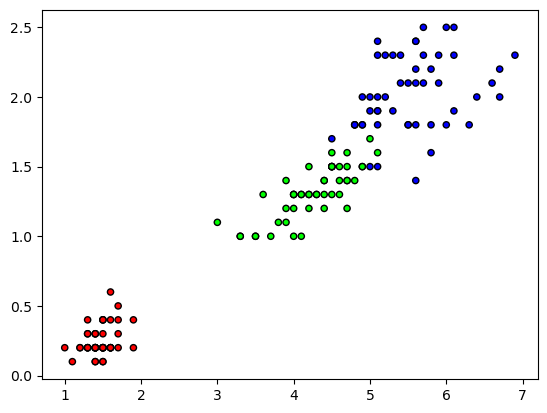

In [4]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [5]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
0.9666666666666667
